# 3(1)-기초통계/ML

## Iris 데이터셋을 활용해 클래스별 변수 평균 차이를 검정

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
# Iris 데이터셋 불러오기
iris = sns.load_dataset('iris')

# Iris 데이터셋 구조 및 상위 데이터 확인
print(iris.shape)
print(iris.head())

# Iris 데이터셋 요약 정보
print(iris.info())

# Iris 데이터셋 기본 통계량
print(iris.describe())

(150, 5)
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3

In [3]:
# Species 별 Petal length 기술 통계량
print(iris.groupby('species')['petal_length'].describe())
# 그룹별 데이터 개수 확인
print(iris['species'].value_counts())

            count   mean       std  min  25%   50%    75%  max
species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9
setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


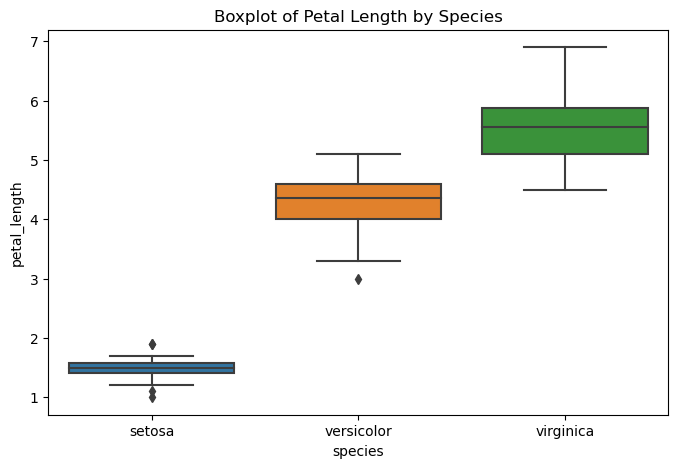

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot 시각화
plt.figure(figsize=(8, 5))
sns.boxplot(data=iris, x='species', y='petal_length')
plt.title('Boxplot of Petal Length by Species')
plt.show()

virginica 종의 petal length 평균이 가장 길며, versicolor는 그보다 짧고 setosa의 평균이 1.462로 가장 짧다.  
setosa의 Petal Length는 전체적으로 값들이 좁은 구간에 밀집되어 있어 변동성이 낮으며, 대칭적인 분포를 가지는 것으로 보인다. versicolor는 setosa 보다 넓은 분포를 가지며 Q1과 Q3의 간격이 상대적으로 크다. virginica는 세 그룹 중 가장 넓은 분포를 가진다. 

#### Species별 Shapiro-Wilk 정규성 검정 
귀무가설(H₀): 해당 품종의 petal_length는 정규분포를 따른다.  
대립가설(H₁): 정규분포를 따르지 않는다.  
유의수준(α): 0.05

In [5]:
from scipy.stats import shapiro

# 품종 별 Shapiro-Wilk 검정
for species in iris['species'].unique():
    stat, p = shapiro(iris[iris['species'] == species]['petal_length'])
    print(f'{species}: p-value = {p:.4f}')

setosa: p-value = 0.0548
versicolor: p-value = 0.1585
virginica: p-value = 0.1098


setosa 종의 Shapiro-Wilk 정규성 검정 결과, p-value는 0.0548 > 0.05 이므로 귀무가설을 채택한다.  
versicolor 종의 Shapiro-Wilk 정규성 검정 결과, p-value는 0.1585 > 0.05 이므로 귀무가설을 채택한다.  
virginica 종의 Shapiro-Wilk 정규성 검정 결과, p-value는 0.1098 > 0.05 이므로 귀무가설을 채택한다.  
세 품종 모두 유의수준 0.05 하에서, petal_length가 정규분포를 따른다.

In [6]:
from scipy.stats import levene

# 3 그룹 나누기
setosa = iris[iris['species'] == 'setosa']['petal_length']
versicolor = iris[iris['species'] == 'versicolor']['petal_length']
virginica = iris[iris['species'] == 'virginica']['petal_length']

#### Levene 검정을 통한 등분산성 검정
귀무가설(H₀): 세 그룹의 모분산은 같다. (등분산이다.)  
대립가설(H₁): 적어도 한 그룹의 분산이 다르다.  
유의수준(α): 0.05

In [7]:
# Levene’s test
stat, p = levene(setosa, versicolor, virginica)
print(p)

3.1287566394085344e-08


p-value가 유의수준인 0.05보다 작으므로 귀무가설을 기각한다.  
유의수준 0.05 하에서, 세 그룹 중 적어도 한 그룹의 분산이 다르다. 

#### 가설 수립
귀무가설(H₀): 3개 Species 간 Petal Length의 평균은 모두 같다.  
대립가설(H₁): 적어도 하나의 종의 Petal Length 평균은 다르다.  
유의수준(α): 0.05


In [8]:
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('petal_length ~ C(species)', data=iris).fit()

# ANOVA 테이블 출력
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# One-way ANOVA 
f_stat, p_value = f_oneway(setosa, versicolor, virginica)

print(f_stat)
print(p_value)

              sum_sq     df            F        PR(>F)
C(species)  437.1028    2.0  1180.161182  2.856777e-91
Residual     27.2226  147.0          NaN           NaN
1180.161182252981
2.8567766109615584e-91


p-value = 2.8567766109615584e-91 < 0.05 이므로 귀무가설을 기각한다.  
유의수준 0.05에서 적어도 하나의 종의 Petal Length 평균은 다르다.  

In [9]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey HSD 사후검정
tukey = pairwise_tukeyhsd(endog=iris['petal_length'], groups=iris['species'], alpha=0.05)
print(tukey.summary())

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


#### Tukey HSD 사후검정 결과
Tukey HSD 사후검정 결과, 모든 종(species) 간 쌍에서 Petal Length의 평균 차이가 통계적으로 유의미하다.  

setosa – versicolor: 유의미한 차이 있음 (p < 0.05)  
setosa – virginica: 유의미한 차이 있음 (p < 0.05)  
versicolor – virginica: 유의미한 차이 있음 (p < 0.05)  

세 종의 Petal Length 평균은 각각 서로 다르며, virginica > versicolor > setosa 순으로 확인할 수 있다.

#### 9. 결과 요약

Boxplot을 통해 virginica의 Petal Length가 가장 길고, versicolor, setosa 순으로 확인했다.
ANOVA 결과, p-value < 0.05로 세 개의 species 간의 평균 차이가 통계적으로 유의미 한 것으로 확인되었다.  
Tukey HSD 사후검정 결과, 세 종 간의 모든 쌍에서 유의미한 차이가 있었디.  
결론적으로, 세 종의 Petal Length는 통계적으로 유의하게 차이가 난다고 할 수 있다.


## 실제 신용카드 사기 데이터셋을 활용해 클래스 불균형 상황에서 분류 모델을 학습

In [10]:
from collections import Counter
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, average_precision_score, precision_recall_curve, f1_score
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

In [11]:
# 데이터 로드 & 기본 탐색
df = pd.read_csv('creditcard.csv')

print(df.head())
print(df.info())
print(df['Class'].value_counts())
print(df['Class'].value_counts(normalize=True)*100)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

전체 거래 총 284 807건 중 사기 건수(Class=1)는 492건(≈ 0.17%)에 해당한다.  
class 간 심한 불균형이 확인되므로, SMOTE를 적용하는 것이 적합할 것으로 보인다.

In [12]:
# 샘플링
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0].sample(n=10_000, random_state=42)

reduced_df = pd.concat([fraud, normal]).sample(frac=1, random_state=42) 

counts = Counter(reduced_df['Class'])
print("클래스 건수:", counts)

total = sum(counts.values())
ratios = {k: f"{v/total*100:.2f}%" for k, v in counts.items()}

print("클래스 비율:")
for k in sorted(ratios.keys()):
    label = '정상 (0)' if k == 0 else '사기 (1)'
    print(f"{label}: {ratios[k]}")

클래스 건수: Counter({0: 10000, 1: 492})
클래스 비율:
정상 (0): 95.31%
사기 (1): 4.69%


In [13]:
# 데이터 전처리 

reduced_df['Amount_Scaled'] = StandardScaler().fit_transform(reduced_df[['Amount']])
reduced_df = reduced_df.drop(columns=['Amount'])

X = reduced_df.drop(columns=['Class'])
y = reduced_df['Class']

In [14]:
# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(Counter(y_train), Counter(y_test))

Counter({0: 7999, 1: 394}) Counter({0: 2001, 1: 98})


In [15]:
#SMOTE 적용
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print('SMOTE 적용 전:', Counter(y_train))
print('SMOTE 적용 후:', Counter(y_train_sm))

SMOTE 적용 전: Counter({0: 7999, 1: 394})
SMOTE 적용 후: Counter({0: 7999, 1: 7999})


주어진 신용카드 사기 데이터셋은 사기 거래의 건수가 전체 거래(Class=1) 건수의 약 0.17%에 불과할 정도로 클래스 간의 불균형 정도가 심하다. 소수 클래스가 매우 작은 경우, 모델이 대부분의 예측을 정상 거래(Class=0)로만 하게 되고, 사기 거래(Class=1)를 놓치게 된다. 이는 주어진 모델 성능 목표 달성을 어렵게 힌다.   
따라서 소수 클래스를 오버샘플링하는 방식을 택해야 한다. SMOTE의 경우, 소수 클래스를 단순 복사하는 것이 아닌 소수 클래스의 기존 데이터 사이에 새로운 데이터를 생성하여 단순 복사 시 발생할 수 있는 과적합 문제를 방지할 수 있다. 

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

여러가지 모델로 분류해 본 결과, 랜덤 포레스트 알고리즘을 사용하는 RandomForestClassifier 모델을 선정했다. 여러 개의 Decision Tree Classifiers를 데이터셋의 다양한 하위 샘플에 훈련시키고, 이 트리들의 결과를 평균내어 예측하는 모델이다.  
주요 파라미터로는 n_estimators(생성할 트리 개수), max_depth(트리의 최대 깊이), max_features(각 노드에서 고려할 feature 수), min_samples_split(노드를 분할하기 위한 최소 샘플 수) 등이 있다. 

In [17]:
# 모델 학습
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train_sm, y_train_sm)

# 테스트셋 예측
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# 성능 평가
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("PR-AUC :", average_precision_score(y_test, y_proba).round(4))

Classification Report:
              precision    recall  f1-score   support

           0     0.9916    0.9990    0.9953      2001
           1     0.9759    0.8265    0.8950        98

    accuracy                         0.9909      2099
   macro avg     0.9837    0.9128    0.9451      2099
weighted avg     0.9908    0.9909    0.9906      2099

PR-AUC : 0.9158


Recall, F1, PR-AUC 등의 지표 상에서 성능이 괜찮은 것으로 보이지만, 더욱 향상시키기 위해 F1 을 기준으로 threshold를 조정한다. 

In [18]:
from sklearn.metrics import precision_recall_curve

prec, rec, thresholds = precision_recall_curve(y_test, y_proba)
f1 = 2 * prec * rec / (prec + rec)
best_threshold = thresholds[f1.argmax()]
print(best_threshold)

# 새로운 threshold로 예측
y_pred_custom = (y_proba >= best_threshold).astype(int)

# 평가
print(classification_report(y_test, y_pred_custom, digits=4))

0.51
              precision    recall  f1-score   support

           0     0.9916    0.9990    0.9953      2001
           1     0.9759    0.8265    0.8950        98

    accuracy                         0.9909      2099
   macro avg     0.9837    0.9128    0.9451      2099
weighted avg     0.9908    0.9909    0.9906      2099



최적 threshold 값이 0.5와 근사하여, 성능에 차이가 생기지 않았다. 

In [19]:
# 학습셋 성능 평가
y_train_proba = rf.predict_proba(X_train_sm)[:, 1]
y_train_custom = (y_train_proba >= best_threshold).astype(int)

print("Train Classification Report:")
print(classification_report(y_train_sm, y_train_custom, digits=4))

print("Train PR-AUC :", average_precision_score(y_train_sm, y_train_proba).round(4))

Train Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      7999
           1     1.0000    1.0000    1.0000      7999

    accuracy                         1.0000     15998
   macro avg     1.0000    1.0000    1.0000     15998
weighted avg     1.0000    1.0000    1.0000     15998

Train PR-AUC : 1.0


추가적으로 학습셋 성능을 확인한 결과, 오버피팅 이슈가 확인되었다. 

In [20]:
# 모델 학습
rf2 = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=200,          # 트리 개수 제한
    max_depth=6,               # 트리 깊이 제한
    min_samples_leaf=12,        # 잎 노드에 존재해야 하는 최소 데이터
    max_features='sqrt'        # 각 노드에서 고려할 특성의 수
)
rf2.fit(X_train_sm, y_train_sm)

# 테스트셋 예측
y2_pred = rf2.predict(X_test)
y2_proba = rf2.predict_proba(X_test)[:, 1]

# 성능 평가
print("Classification Report:")
print(classification_report(y_test, y2_pred, digits=4))

print("PR-AUC :", average_precision_score(y_test, y2_proba).round(4))

Classification Report:
              precision    recall  f1-score   support

           0     0.9910    0.9960    0.9935      2001
           1     0.9091    0.8163    0.8602        98

    accuracy                         0.9876      2099
   macro avg     0.9501    0.9062    0.9269      2099
weighted avg     0.9872    0.9876    0.9873      2099

PR-AUC : 0.906


오버피팅을 줄이기 위해 하이퍼파라미터들을 제한하여 다시 성능을 확인했다.  
Class 0에 대해 목표 Recall ≥ 0.80, F1 ≥ 0.88, PR-AUC ≥ 0.90 을 달성하였으나, Class 1에 대해서는 F1 ≥ 0.88을 달성하지 못했으므로 F1 을 기준으로 threshold 를 조정해 성능을 향상시킨다. 

In [21]:
# threshold 조정
prec, rec, thresholds = precision_recall_curve(y_test, y2_proba)
f1 = 2 * prec * rec / (prec + rec )
best_threshold = thresholds[f1.argmax()]
print("Best threshold:", round(best_threshold, 4), "with F1 =", round(f1.max(), 4))

y2_pred_custom = (y2_proba >= best_threshold).astype(int)

# 조정된 threshold로 성능 평가
print("Custom Threshold Classification Report:")
print(classification_report(y_test, y2_pred_custom, digits=4))

print("PR-AUC:", round(average_precision_score(y_test, y2_proba), 4))


Best threshold: 0.642 with F1 = 0.8827
Custom Threshold Classification Report:
              precision    recall  f1-score   support

           0     0.9906    0.9990    0.9948      2001
           1     0.9753    0.8061    0.8827        98

    accuracy                         0.9900      2099
   macro avg     0.9829    0.9026    0.9387      2099
weighted avg     0.9899    0.9900    0.9895      2099

PR-AUC: 0.906


Class 0과 1 각각에 대해 목표 Recall ≥ 0.80, F1 ≥ 0.88, PR-AUC ≥ 0.90 을 달성한 것을 확인할 수 있다. 

In [22]:
# 학습셋 성능 평가
y2_train_proba = rf2.predict_proba(X_train_sm)[:, 1]
y2_train_custom = (y2_train_proba >= best_threshold).astype(int)

print("Train Classification Report:")
print(classification_report(y_train_sm, y2_train_custom, digits=4))

print("Train PR-AUC :", average_precision_score(y_train_sm, y2_train_proba).round(4))

Train Classification Report:
              precision    recall  f1-score   support

           0     0.9378    0.9992    0.9676      7999
           1     0.9992    0.9337    0.9654      7999

    accuracy                         0.9665     15998
   macro avg     0.9685    0.9665    0.9665     15998
weighted avg     0.9685    0.9665    0.9665     15998

Train PR-AUC : 0.9974


학습셋에 대해 모든 지표가 1.0으로 나타났던 이전 모델과 달리, 현재 모델은 여전히 학습셋에서 높은 성능을 유지하지만, 과도한 학습은 어느 정도 완화된 것으로 보인다. 다만, 테스트셋과의 성능 차이를 고려할 때 약간의 과적합 위험은 여전히 존재하며, 일반화 성능을 더욱 향상시키기 위한 추가적인 조정이 필요할 수 있다고 보인다.